C:/Users/User/Desktop/NMR/500/AS-6-50A-500/1/pdata/1
C:/Users/User/Desktop/NMR/500/AS-6-50A-500/2/pdata/1
C:/Users/User/Desktop/NMR/500/AS-6-50A-500/3/pdata/1
C:/Users/User/Desktop/NMR/500/AS-6-50A-500/4/pdata/1


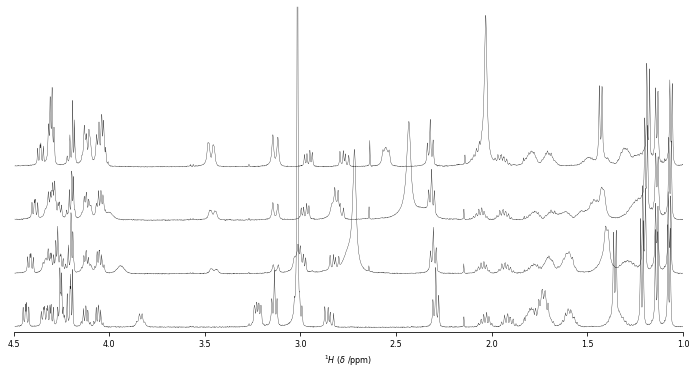

In [2]:
#! /usr/bin/env python
# Create a contour plot of a 2D Bruker spectrum

import nmrglue as ng
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.gridspec import GridSpec

# MAKE SURE THAT THE NUMBER OF FILENAMES, COLOUR, LIMITS, OFFSETS AND SCALE ARE SAME
# WARNING - CHECK THE AXIS LIMITS OF THE PLOTS (SPECIALLY PROJECTIONS) INDIVIDUALLY...
# ...IF PLOTTING PHASE SENSITIVE DATA THE AXIS NEEDS TO BE REVERSED


# File names - collect filenames 
fname=["C:/Users/User/Desktop/NMR/500/AS-6-50A-500/1/pdata/1", "C:/Users/User/Desktop/NMR/500/AS-6-50A-500/2/pdata/1",
       "C:/Users/User/Desktop/NMR/500/AS-6-50A-500/3/pdata/1", "C:/Users/User/Desktop/NMR/500/AS-6-50A-500/4/pdata/1"]

#section to colour code:
sec = []

# Plot colours
colors_list = ['black','black','black','black'] # Colours for projections

# Plot limits 
# NOTE- goes higher to lower because origin on NMR axis is reversed
limit_x = [4.5,1]

# Plot offsets - if uncertain, turn axis for each plot 'on' and check the axis ticks
# Has to be the same number as the files in 'fname'
offset_y = [0,5e11,1e12,1.5e12]

# Plot scale up (1 for default scale) - gets multiplies with the 1D data to increase scale
# Has to be the same number as the files in 'fname'
scale_y = [30,30,30,30]

# Label for x and y axis
label_x = '$^1H$'+' '+'$(\delta$'+' '+'/ppm)'
#label_x = '$^{13}C$'+' '+'$(\delta$'+' '+'/ppm)'

# Create the figure subplots
#size for paper = (4,2)
fig = plt.figure(figsize=(12,6),constrained_layout=False)
# Use gridspace if creating multiple subplots
gs = GridSpec(3, 3, figure=fig, wspace=0.002, hspace=0.05)
ax1 = fig.add_subplot(gs[:,:])

# Plot data  
for f,c,offset,scale in zip(fname, colors_list, offset_y, scale_y):
    # Grab data
    dic, data = ng.bruker.read_pdata(f)
    print(f)
       
    # Make universal dictionary to grab axis data
    udic = ng.bruker.guess_udic(dic, data)
    uc0 = ng.fileiobase.uc_from_udic(udic)
    
    # Plot data
    ax1.plot(uc0.ppm_scale(),(data*scale)+offset, c, linewidth =0.3)

# Zoom in the region of interest 
#ax1.axis('off')
ax1.set_xlim(limit_x[0],limit_x[1])
ax1.set_ylim(-5e10,3e12)

# Decorate the axis

ax1.set_xlabel(label_x, fontsize=8) # Label the x-axis
ax1.tick_params(axis='x', which='major', labelsize=8)

#ax1.set_ylabel(label_y) # Label the y-axis
#ax1.tick_params(axis='y', which='major', labelsize=8)

#ax1.set_xticks([34,31,28])
#ax1.set_xticklabels([34,31,28],fontsize=6)

ax1.axes.get_yaxis().set_visible(False) # Remove y-axis
#ax1.axes.get_xaxis().set_visible(False) # Remove x-axis

#ax1.tick_params(labelleft=False, labelright=True, left=False, right=True) # This shifts the x-axis or y-axis ticks from left side to right side or vice versa
#ax1.yaxis.set_label_position("right") # This shifts the y-axis label to right, can use the same for x-axis

# Remove spines or the box around the plot (but leave the x-axis line)
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')

plt.show()

#fig.savefig('titration Kme3', dpi=120, bbox_inches='tight', pad_inches=0)
